<a href="https://colab.research.google.com/github/valizcanos/ProcesosUnitarios/blob/main/Cin%C3%A9ticaHumedalesConstruidos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

Datos tomados del libro "Natural systems for wastewater management and treatment" de Reed et al., 1995

# DBO, NH4 y NO3 remoción

$C_e = C_i * e^{k_{T}*t}$<br>
$k_T = K_{R}* \theta_{R}^{T_w - T_R}$<br>
$HLR = \frac{Q}{A}$

$C_e $: concentración de salida <br>
$C_i $: concentración de entrada <br>
$\theta_{R}$: parámetro de referencia basado en la temperatura<br>
$t $: tiempo de retención hidráulico<br>
$T_R $: temperatura de referencia, por lo general es 20°C <br>
$T_w $: temperatura del agua, promedio en el humedal<br>
$A$: área de la sección de flujo

$t = \frac{A*y*n}{Q}$<br>
$A = W*y$<br>
$L:W$=10

$Q$: caudal <br>
$y$: altura del humedal <br>
$n$: fracción porosa del medio filtrante <br>
$n = \frac{V_v}{V}$ <br>
$V_v$: volumen de vacios del medio<br>
$V$: Volumen del humedal<br>
$W$: ancho del humedal<br>
$L$: longitud del humedal

## Remoción de DBO, humedal de flujo sub-superficial

In [2]:
Tr = 20 #°C
KR = 1.104 #1/d recomendado para DBO
tetaR = 1.06 # recomendado para DBO

In [32]:
n = np.linspace(0.1,0.6, 10) # caudales en m3/d
t = np.linspace(0,10,100) # fracción porosa

In [33]:
def DBOremocion(w,y,t,n,ci,kr,theta,Tr,Tw):
  A = w*y
  L = 10*w
  for i in range(len(n)):
    q = (A*y*n[i])/t
    kt = kr*theta**(Tw-Tr)
    ce = ci*np.exp(-kt*t)
    plt.plot(q,ce, label= np.round(n[i],2))
    plt.legend(title="n")
    plt.title("Area = %1.2f "%A + "Ancho = %1.2f " %w + "Altura = %1.2f " %y + "Largo = %1.2f " %L)
    plt.xlabel("Caudal, m3/d")
    plt.ylabel("Concentración de salida, mg/L")
    #print("Para n = %f " %n + ", Q = %f" %q)


<ipython-input-33-aabe32bc420c>:5: RuntimeWarning: divide by zero encountered in true_divide
  q = (A*y*n[i])/t


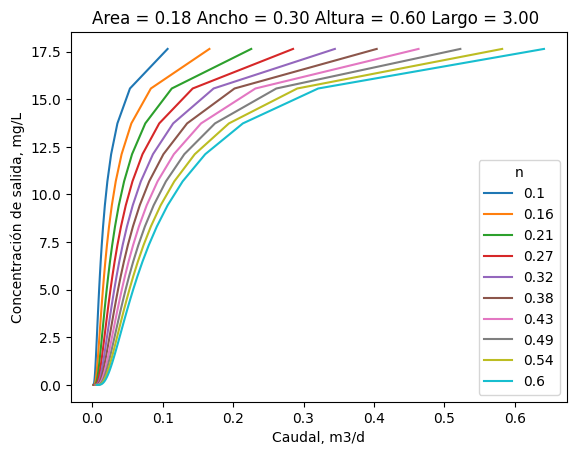

In [34]:
# Para una temperatura de 18°C y una DBO de entrada de 20 mg/L
DBOremocion(0.3,0.6,t,n,20,KR,tetaR,18,20)

<ipython-input-38-f8e5b4082f5c>:4: RuntimeWarning: divide by zero encountered in true_divide
  q1 = (0.3*0.6*n1)/t1


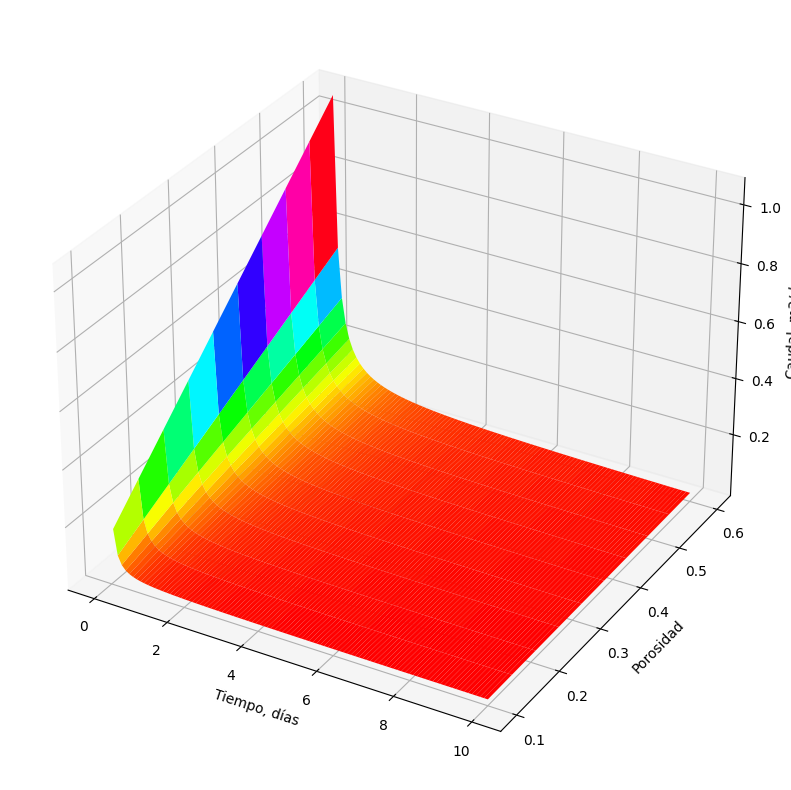

In [38]:
n1 = np.linspace(0.1,0.6, 100) # caudales en m3/d
t1 = np.linspace(0,10,100) # fracción porosa
n1,t1 = np.meshgrid(n,t)
q1 = (0.3*0.6*n1)/t1
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection="3d")
ax.plot_surface(t1, n1, q1, rstride=1, cstride=1,cmap='hsv', edgecolor='none')
ax.set_xlabel("Tiempo, días")
ax.set_ylabel("Porosidad")
ax.set_zlabel("Caudal, $m3/d$")
plt.show()

<ipython-input-39-b23451651c9f>:6: RuntimeWarning: divide by zero encountered in true_divide
  q1 = (0.3*0.6*n1)/t1


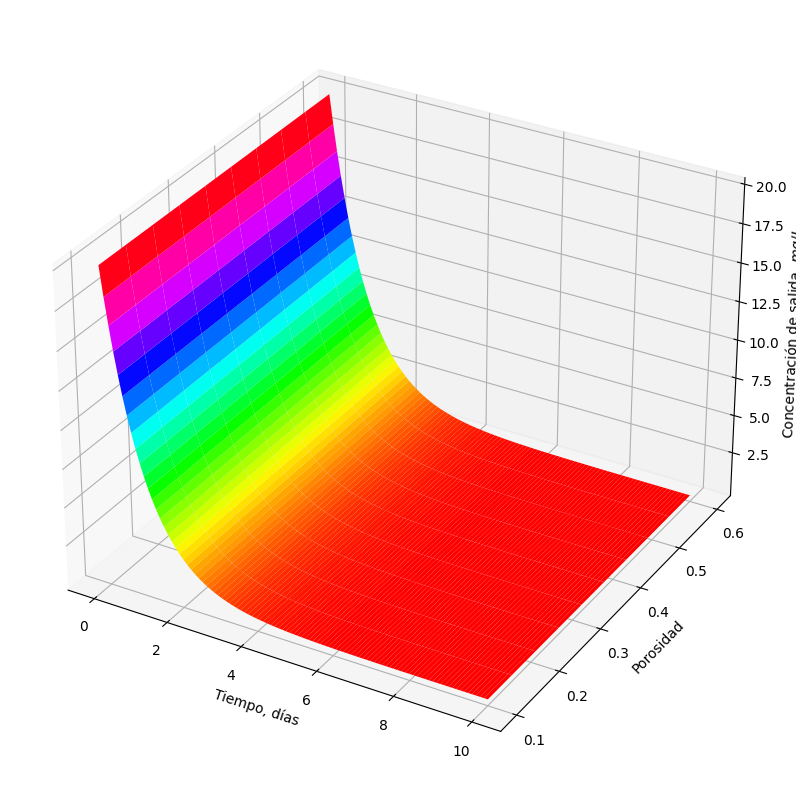

In [39]:
kt1 = KR*tetaR**(18-20)
ce1 = 20 * np.exp(-kt1*t1)
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection="3d")
ax.plot_surface(t1, n1, ce1, rstride=1, cstride=1,cmap='hsv', edgecolor='none')
ax.set_xlabel("Tiempo, días")
ax.set_ylabel("Porosidad")
ax.set_zlabel("Concentración de salida, $mg/L$")
plt.show()

/usr/local/lib/python3.10/dist-packages/mpl_toolkits/mplot3d/proj3d.py:180: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


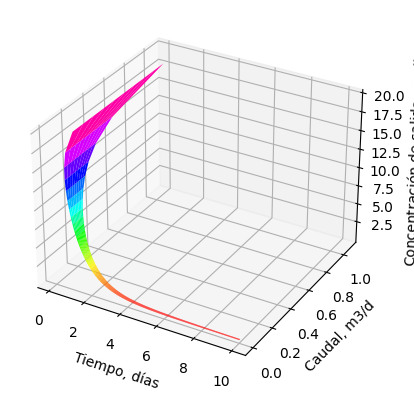

In [40]:
ax = plt.axes(projection="3d")
ax.plot_surface(t1, q1, ce1, rstride=1, cstride=1,cmap='hsv', edgecolor='none')
ax.set_xlabel("Tiempo, días")
ax.set_ylabel("Caudal, m3/d")
ax.set_zlabel("Concentración de salida, $mg/L$")
plt.show()